In [1]:
import requests as r
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Price(symbol, comparison_symbol, all_data=True, aggregate=1, exchange=''):
    a = int(input('1 for Minute\n2 for Hourly\n3 for Daily '))
    if a == 1: limit = 9999; url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'.format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    elif a == 2: limit = 9999; url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'.format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    elif a == 3: limit = 1; url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'.format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if all_data and a == 3: url += '&allData=true'
    if exchange: url += '&e={}'.format(exchange)
    df = pd.DataFrame(r.get(url).json()['Data'])
    df['timestamp'] = [dt.datetime.fromtimestamp(d) for d in df.time]
    print('max length = {}'.format(len(df)))
    print('Max time = {}'.format(df.timestamp.max()- df.timestamp.min()))
    plt.plot(df.timestamp, df.close)
    plt.xticks(rotation = 30)
    return plt.show()

1 for Minute
2 for Hourly
3 for Daily 1
max length = 2001
Max time = 1 days 09:20:00


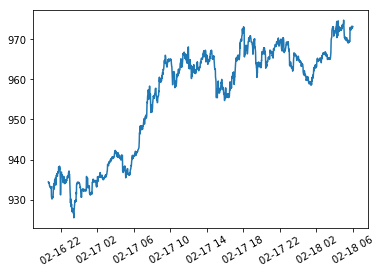

None


In [3]:
print(Price('ETH', 'USD'))

1 for Minute
2 for Hourly
3 for Daily 2
max length = 2001
Max time = 83 days 08:00:00


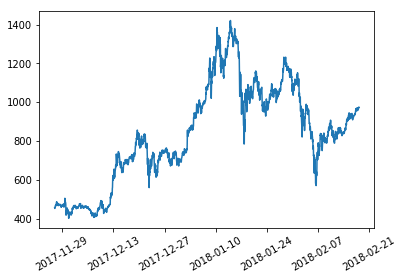

None


In [4]:
print(Price('ETH', 'USD'))

1 for Minute
2 for Hourly
3 for Daily 3
max length = 927
Max time = 926 days 00:00:00


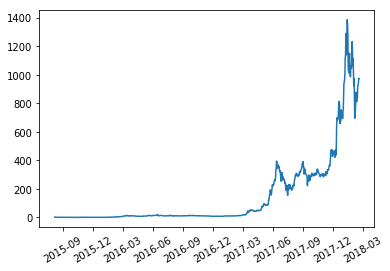

None


In [5]:
print(Price('ETH', 'USD'))

In [6]:
#hourly, daily, and yearly changes plotting of ETHEREUM COIN.